# Lead Score - Logistic Regression

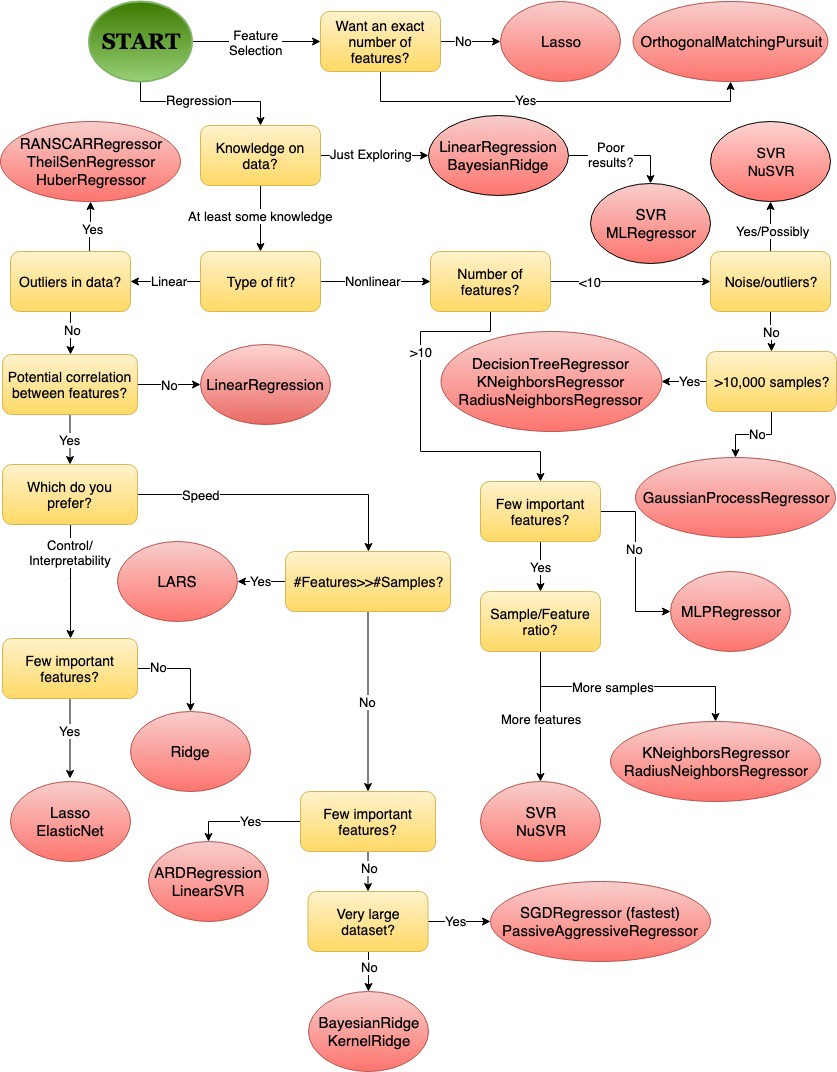

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline


# Read and load data

In [2]:

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified



# Data Inspection


In [4]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Null value handling

In [8]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)
# print(data.head())
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
print(data.isnull().sum().sort_values(ascending=False))

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

In [10]:
# we will drop the columns having more than 70% NA values.
null_perc=round(100*(data.isnull().sum()/len(data.index)), 2)
data = data.drop(data.loc[:,list(null_perc>70)].columns, 1)
data.shape

(9240, 35)

In [11]:
print(data.isnull().sum().sort_values(ascending=False))

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                   

# Data Cleaning

In [12]:
# Asymmetrique Activity Index  |
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile
# Asymmetrique Profile Score   \

# fig, axs = plt.subplots(2,2, figsize = (10,7.5))
# plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
# plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
# plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
# plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
# plt.tight_layout()

df_Asymmetrique=data[['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score']]
print(df_Asymmetrique.describe())
# There is too much variation in thes parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)
print('================')
print(data.isnull().sum().sort_values(ascending=False))

       Asymmetrique Activity Score  Asymmetrique Profile Score
count                  5022.000000                 5022.000000
mean                     14.306252                   16.344883
std                       1.386694                    1.811395
min                       7.000000                   11.000000
25%                      14.000000                   15.000000
50%                      14.000000                   16.000000
75%                      15.000000                   18.000000
max                      18.000000                   20.000000
Lead Quality                                     4767
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
T

In [13]:
# Lead Quality: Indicates the quality of lead based on the data 
# and intuition the the employee who has been assigned to the lead
print(data['Lead Quality'].describe())
print('======================')
print(data['Lead Quality'].value_counts())
print('======================')
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
# sns.countplot(data['Lead Quality'])
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')
# sns.countplot(data['Lead Quality'])
print('================')

print(data.isnull().sum().sort_values(ascending=False))

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Total Time Spent on Website                         0
Last Notable Activity                               0
Converted                                           0
Do Not Email             

In [14]:
# City
print(data.City.describe())
print('=================')

# sns.countplot(data.City)
# xticks(rotation = 90)
print(data.City.value_counts())

# We can impute Other Cities in the missing values.
data['City'] = data['City'].replace(np.nan, 'Other Cities')
print('================')

print(data.isnull().sum().sort_values(ascending=False))

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Do Not Email     

In [15]:
# Specailization
print(data.Specialization.describe())

# sns.countplot(data.Specialization)
# xticks(rotation = 90)
print('=====================')
print(data.Specialization.value_counts())

# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values.
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')
print('================')

print(data.isnull().sum().sort_values(ascending=False))

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
Tags                                             3353
What matters most to 

In [16]:
# Tags
print(data.Tags.describe())
print('================')

# fig, axs = plt.subplots(figsize = (15,7.5))
# sns.countplot(data.Tags)
# xticks(rotation = 90)
print('================')

print(data.Tags.value_counts())

# Blanks in the tag column may be imputed by 'Will revert after reading the email'.
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

print('================')
print(data.isnull().sum().sort_values(ascending=False))

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                  

In [17]:
# What matters most to you in choosing a course
colname='What matters most to you in choosing a course'
print(data[colname].describe())
print('================')

print(data[colname].value_counts())
print('================')

# Blanks in the this column may be imputed by 'Better Career Prospects'.
data[colname] = data[colname].replace(np.nan, 'Better Career Prospects')
print(data.isnull().sum().sort_values(ascending=False))

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
What matters most to you in choosing a course       0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                        

In [18]:
# Occupation
colname='What is your current occupation'
print(data[colname].describe())
print('================')

print(data[colname].value_counts())
print('================')

# 86% entries are of Unemployed, but we can impute new category "Others" in it.
data[colname] = data[colname].replace(np.nan, 'Unemployed')
print(data.isnull().sum().sort_values(ascending=False))

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
What matters most to you in choosing a course       0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                  

In [19]:
# Country
print(data['Country'].describe())
print('================')

print(data['Country'].value_counts())
print('================')

#Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')
print(data.isnull().sum().sort_values(ascending=False))

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Ghana                      2
Philippines                2
China                      2
Bangladesh                 2
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
Belgium                    2
Italy                      2
Denmark                    1
Tanzania                   1
Vietnam                    1
Sri Lank

In [20]:
# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

print(data.isnull().sum().sort_values(ascending=False))

Last Notable Activity                            0
What matters most to you in choosing a course    0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
Search                                           0
A free copy of Mastering The Interview           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [21]:
# Check for single valued columns - we can drop these
single_val_cols=[]
for i in data.columns:
    lst = data[i].unique()
    if len(lst) == 1:
        single_val_cols.append(i)
        
print(single_val_cols)
for j in single_val_cols:
    print(data[j].value_counts())
    
data = data.drop(single_val_cols,1)
print('================')
print(data.shape)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
No    9074
Name: Magazine, dtype: int64
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
No    9074
Name: Update me on Supply Chain Content, dtype: int64
No    9074
Name: Get updates on DM Content, dtype: int64
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
(9074, 26)


In [22]:
data.to_csv('Leads_cleaned')

# Exploratory Data Analytics


### Verify and convert datatypes if needed

In [23]:
print(data.dtypes)
#No need to convert datatypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums             

# Univariate Analysis

### Identify binary variables


In [24]:

# Converting binary variables (Yes/No) to 1/0
# List of variables to map
binary_cols =  ['Do Not Email', 'Do Not Call','Search','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations',
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[binary_cols] = data[binary_cols].apply(binary_map)
# data[varlist].dtypes

binary_cols.append('Converted')
# separate binary - "0/1"  variables from numerical cols:
print(binary_cols)

['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Converted']


In [25]:
for c in binary_cols:
    print('=================',c,'============')
    print(data[c].value_counts())

================= Do Not Email ============
0    8358
1     716
Name: Do Not Email, dtype: int64
================= Do Not Call ============
0    9072
1       2
Name: Do Not Call, dtype: int64
================= Search ============
0    9060
1      14
Name: Search, dtype: int64
================= Newspaper Article ============
0    9072
1       2
Name: Newspaper Article, dtype: int64
================= X Education Forums ============
0    9073
1       1
Name: X Education Forums, dtype: int64
================= Newspaper ============
0    9073
1       1
Name: Newspaper, dtype: int64
================= Digital Advertisement ============
0    9070
1       4
Name: Digital Advertisement, dtype: int64
================= Through Recommendations ============
0    9067
1       7
Name: Through Recommendations, dtype: int64
================= A free copy of Mastering The Interview ============
0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64
================= Converted =====

In [26]:
del_lst=['Lead Number','What matters most to you in choosing a course',
         'Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations',         
         'A free copy of Mastering The Interview','Country']

for c in del_lst:
    if c in set(binary_cols) : 
        binary_cols.remove(c)
    
print(binary_cols)   

data = data.drop(del_lst,1)
data.shape  
data.head()



['Do Not Email', 'Do Not Call', 'Converted']


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Other Cities,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


Index(['Do Not Email', 'Do Not Call', 'Converted'], dtype='object')


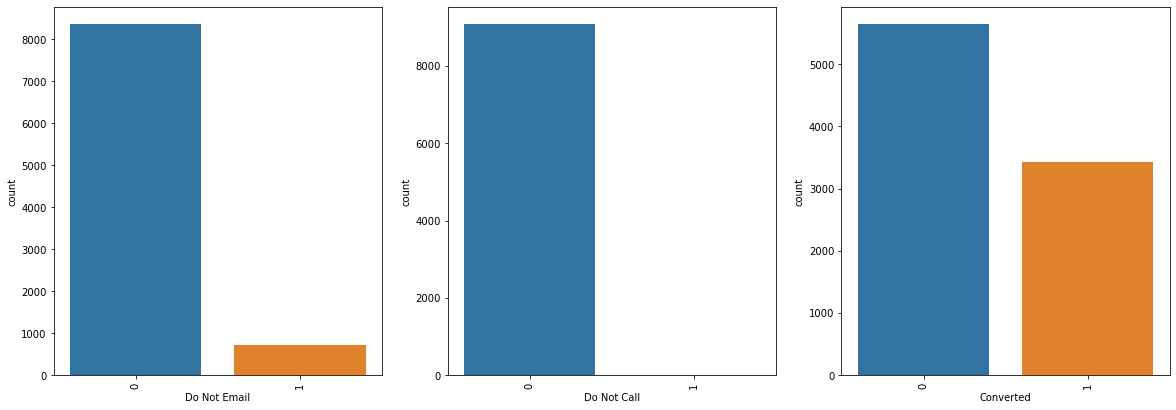

In [27]:

df_binary = data[binary_cols]
print(df_binary.columns)

# Countplot of all binary variables
plt.figure(figsize=(20, 80))

i=1
for c in df_binary.columns:
#     plt.figure(figsize=(10, 8))
    ax2 = plt.subplot(10,3,i)
    sns.countplot(x= c, data = data,ax=ax2)
    plt.xticks(rotation=90)
    i = i + 1
plt.show()

### Conclusion : 
Most entries are 'No'. No Inference can be drawn with below columns, hence we have dropped them
   - Search
   - Magazine
   - Newspaper Article
   - X Education Forums
   - Newspaper
   - Digital Advertisement
   - Through Recommendations
   - Receive More Updates About Our Courses
   - Update me on Supply Chain Content
   - Get updates on DM Content
   - I agree to pay the amount through cheque
   - A free copy of Mastering The Interview


### Identify and prepare data for categorical variables

In [28]:

#categorical cols
df_categorical = data.select_dtypes(exclude=[np.int64, np.float64])
categorical_cols=list(df_categorical.columns)
categorical_cols.remove('Prospect ID')
# print(cat_cols)

df_categorical = data[categorical_cols]
print(df_categorical.columns)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')


In [29]:
# Check if the categorical values can be cleaned/combined
for c in df_categorical.columns:
    print('=================',c,'============')
    print(data[c].value_counts())
    
# Try to correct/replace values 
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


# Last Activity¶
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received',
                                                       'Email Marked Spam'], 'Other_Activity')

# Specialization
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')


# Occupation
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')


# Tags
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')
                                    

================= Lead Origin ============
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
================= Lead Source ============
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
blog                    1
testone                 1
Name: Lead Source, dtype: int64
================= Last Activity ============
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Webs

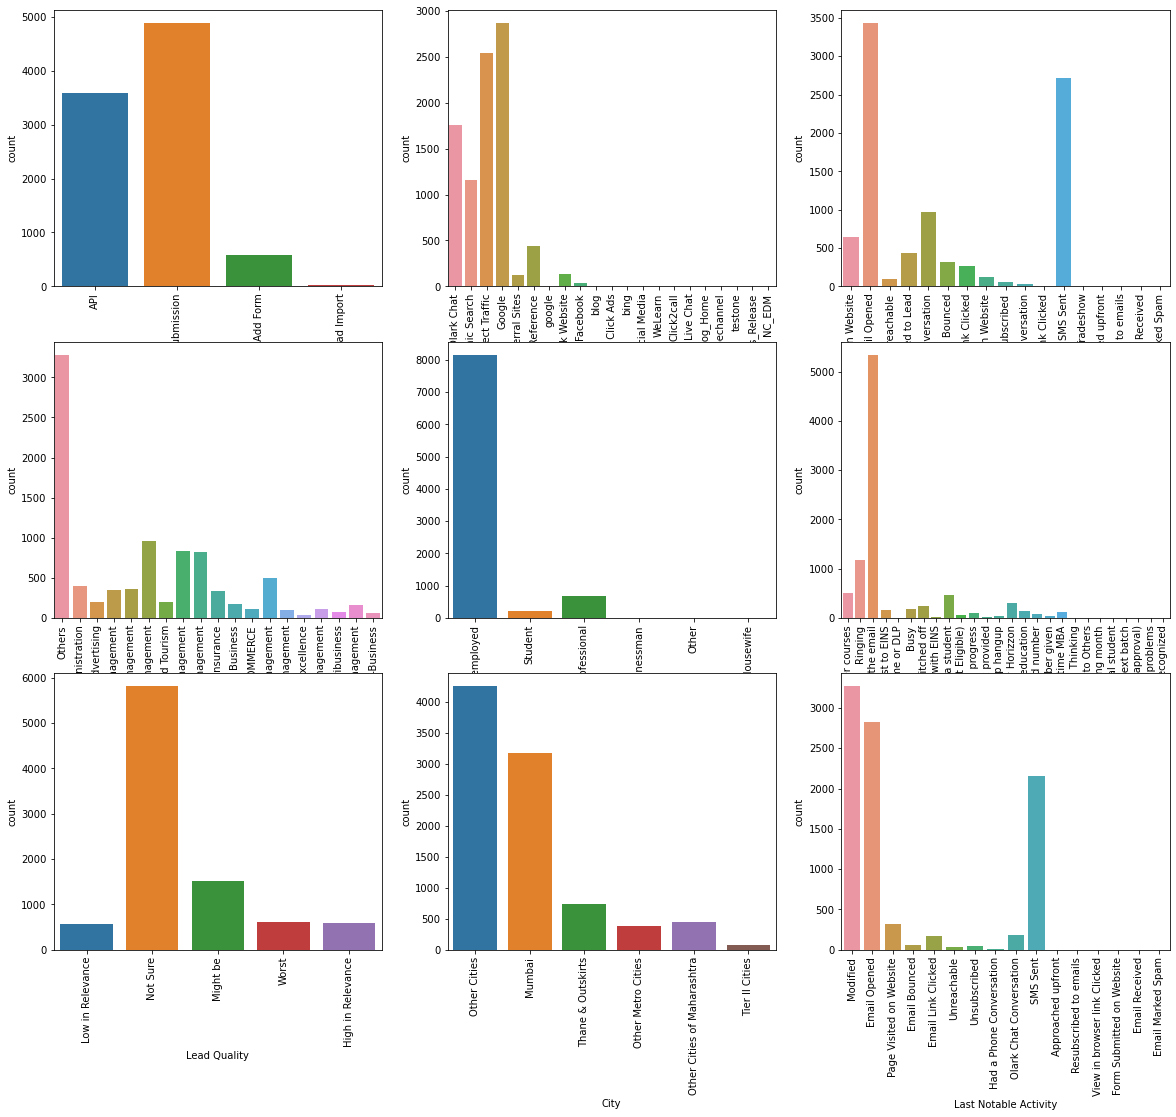

In [30]:
# Countplot of all categorical variables
plt.figure(figsize=(20, 60))

i=1
for c in df_categorical.columns:
#     plt.figure(figsize=(20, 12))
    ax2 = plt.subplot(10,3,i)
    sns.countplot(x= c, data = df_categorical,ax=ax2)
    plt.xticks(rotation=90)
    i = i + 1
plt.show()

### Identify numerical cols and handle outliers

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


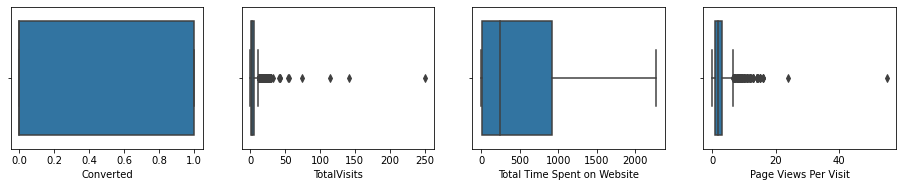

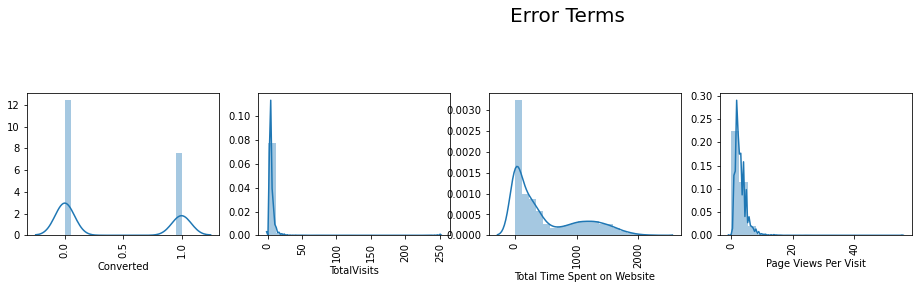

In [31]:
# Boxplot and distplot of all numerical variables
binary_cols =  ['Do Not Email', 'Do Not Call','Search','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations',
            'A free copy of Mastering The Interview']

df_numerical=data.select_dtypes(include=[np.int64, np.float64])
print(df_numerical.columns)
numerical_cols= [i for i in df_numerical.columns if i not in binary_cols]
df_numerical = data[numerical_cols]
print(df_numerical.columns)

plt.figure(figsize=(20, 12))
i=1
for c in numerical_cols:
    plt.subplot(4,5,i)
    sns.boxplot(data[c])
    i = i + 1
plt.show()


# Bin the data and plot the dist plot of the numerical terms
plt.figure(figsize=(20, 12))

i=1
for c in numerical_cols:
    ax1=plt.subplot(4,5,i)
    sns.distplot(df_numerical[c], bins = 20,ax=ax1)
    plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xticks(rotation=90)
    i = i + 1
plt.show()
    


In [32]:
#Handle outliers
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


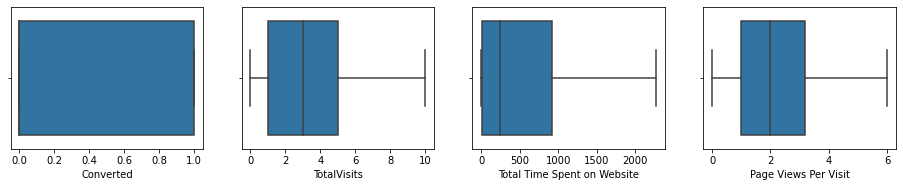

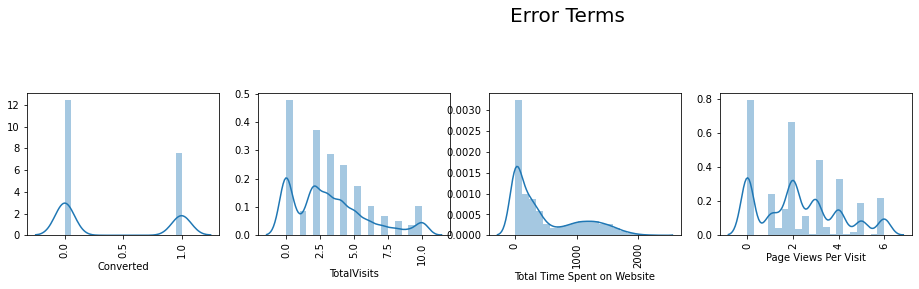

In [33]:
# Boxplot and distplot of all numerical variables
binary_cols =  ['Do Not Email', 'Do Not Call','Search','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations',
            'A free copy of Mastering The Interview']

df_numerical=data.select_dtypes(include=[np.int64, np.float64])
print(df_numerical.columns)
numerical_cols= [i for i in df_numerical.columns if i not in binary_cols]
df_numerical = data[numerical_cols]
print(df_numerical.columns)

plt.figure(figsize=(20, 12))
i=1
for c in df_numerical.columns:
    plt.subplot(4,5,i)
    sns.boxplot(data[c])
    i = i + 1
plt.show()


# Bin the data and plot the dist plot of the numerical terms
plt.figure(figsize=(20, 12))

i=1
for c in df_numerical.columns:
    ax1=plt.subplot(4,5,i)
    sns.distplot(df_numerical[c], bins = 20,ax=ax1)
    plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xticks(rotation=90)
    i = i + 1
plt.show()
    


### Conclusion:

As we can see there are a number of outliers in the data.
We will cap the outliers to 95% value for analysis.



## Bivariate Analysis


### Identify target variable

In [34]:
# Converted is the target variable, 
# Indicates whether a lead has been successfully converted (1) or not (0).

In [35]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

In [36]:
Do_Not_Email = (sum(data['Do Not Email'])/len(data['Do Not Email'].index))*100
Do_Not_Email

7.890676658584968

In [37]:
Do_Not_Call = (sum(data['Do Not Call'])/len(data['Do Not Call'].index))*100
Do_Not_Call


0.02204099625303064

### Conclusion:
We have almost 38% conversion


### Countplot of categorical vars wrt target variable

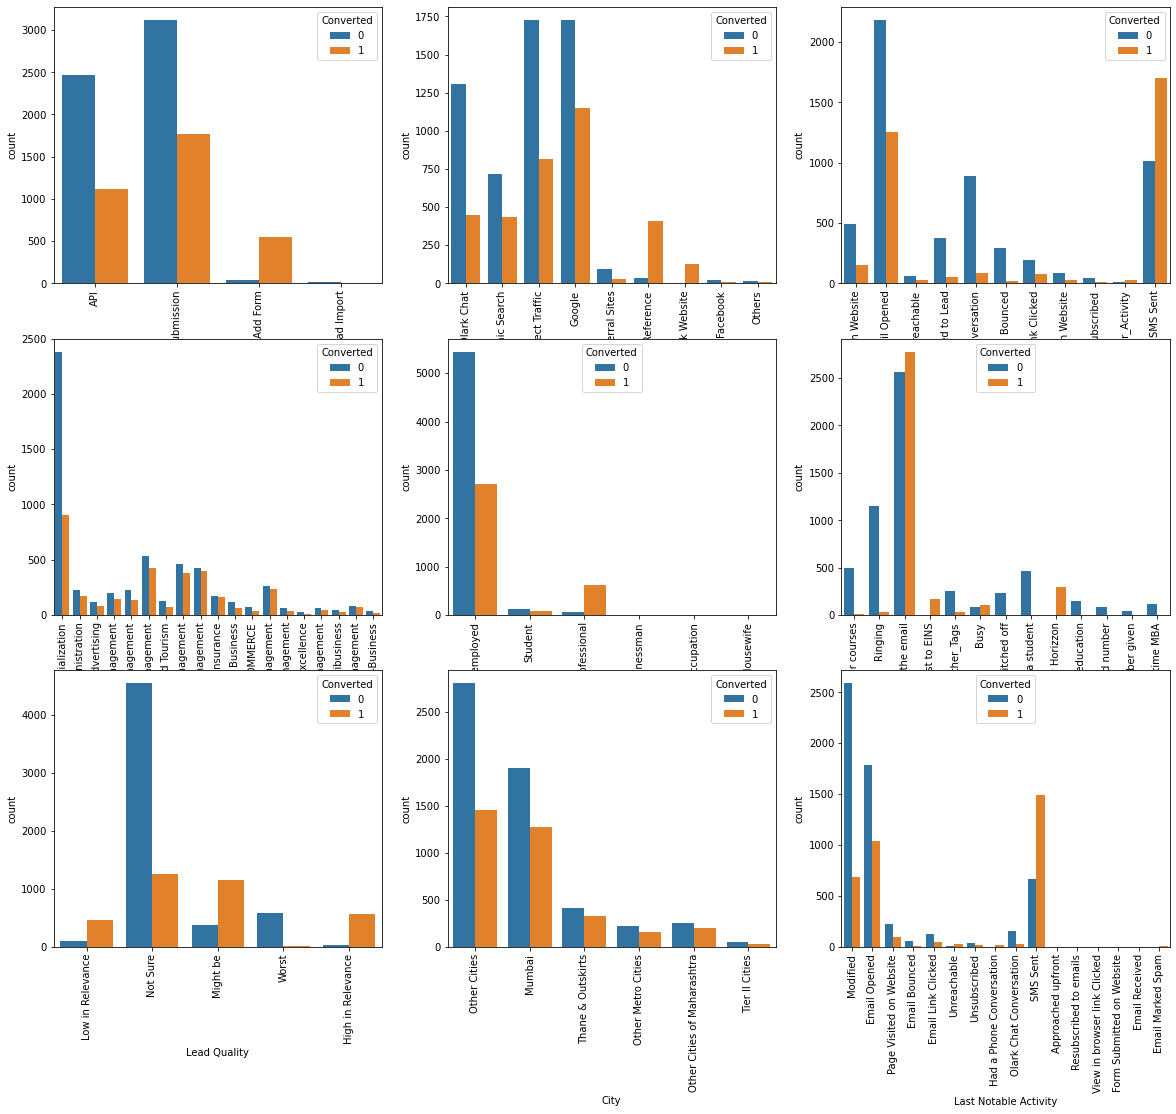

In [38]:
# sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
# xticks(rotation = 90)

plt.figure(figsize=(20, 60))

i=1
for c in df_categorical.columns:
#     plt.figure(figsize=(20, 12))
    ax2 = plt.subplot(10,3,i)
    sns.countplot(x= c,  hue = "Converted", data = data,ax=ax2)
    plt.xticks(rotation=90)
    i = i + 1
plt.show()



### Conclusion:

 Lead Origin
    API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
    Lead Add Form has more than 90% conversion rate but count of lead are not very high.
    Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


 Lead Source

    Google and Direct traffic generates maximum number of leads.
    Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

 Last Activity
    Most of the lead have their Email opened as their last activity.
    Conversion rate for leads with last activity as SMS Sent is almost 60%.b

Country    
Most values are 'India' no such inference can be drawn



Specialization
    Focus should be more on the Specialization with high conversion rate.


Occupation
    Working Professionals going for the course have high chances of joining it.
    Unemployed leads are the most in numbers but has around 30-35% conversion rate.

What matters most to you in choosing a course¶
Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter


City

Most leads are from mumbai with around 30% conversion rate.





# Timeseries data analysis

In [39]:
# There is no timeseries data

### Boxplot of numerical variables wrt target variable


Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


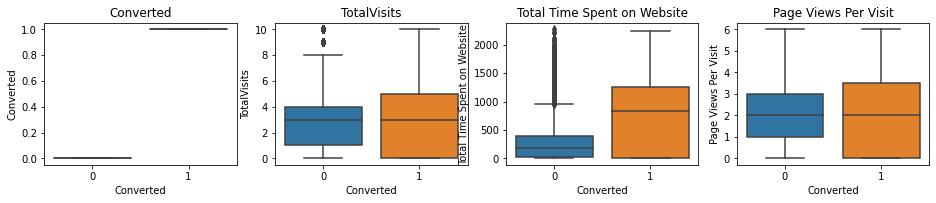

In [40]:
binary_cols =  ['Do Not Email', 'Do Not Call','Search','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations',
            'A free copy of Mastering The Interview']

df_numerical=data.select_dtypes(include=[np.int64, np.float64])
# print(df_numerical.columns)
numerical_cols= [i for i in df_numerical.columns if i not in binary_cols]
df_numerical = data[numerical_cols]
print(df_numerical.columns)


plt.figure(figsize=(20, 12))
i=1
for c in df_numerical.columns:
    plt.subplot(4,5,i)
    sns.boxplot(y=c, x='Converted',data=data)
    plt.title(c)
    i = i + 1
plt.show()




### Conclusion
 TotalVisits:

    Median for converted and not converted leads are the same.

Nothng conclusive can be said on the basis of Total Visits.


 Total time spent on website


    Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time


Page views per visit


    Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit


# One Hot Encoding - create dummy variables
We convert all categorical values to numerical values as input for many regression APIs requires numerical values. 
We do this by creating dummy variables. 
We drop the first value as we can represent that value using other two values. For eg:
            Petrol |  Diesel  | CNG
Petrolcar = 1 | 0 | 0
Dieselcar = 0 | 1 | 0
CNG =       0 | 0 | 1

Thus we can represent Petrolcar even if we drop Petrol column(feature) as Petrolcar can be still represented as (Diesel,CNG)=(0,0) 

In [41]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Other Cities,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [42]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
df_categorical=data.select_dtypes(exclude=[np.int64, np.float64])
df_categorical=df_categorical.columns[1:]#Exclude Prospect ID column

print(df_categorical)
dummy1 = pd.get_dummies(data[df_categorical], drop_first=True)
dummy1.head()

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

data = data.drop(df_categorical, axis = 1)

data.head()


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')


,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
# Remove spaces from col names
cols=data.columns
cols=list(x.replace(' ','_') for x in cols)
data.columns=cols
data.head()

,Prospect_ID,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark_Chat,Lead_Source_Organic_Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral_Sites,Lead_Source_Welingak_Website,Last_Activity_Email_Bounced,Last_Activity_Email_Link_Clicked,Last_Activity_Email_Opened,Last_Activity_Form_Submitted_on_Website,Last_Activity_Olark_Chat_Conversation,Last_Activity_Other_Activity,Last_Activity_Page_Visited_on_Website,Last_Activity_SMS_Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business_Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance_Management,Specialization_Healthcare_Management,Specialization_Hospitality_Management,Specialization_Human_Resource_Management,Specialization_IT_Projects_Management,Specialization_International_Business,Specialization_Marketing_Management,Specialization_Media_and_Advertising,Specialization_Operations_Management,Specialization_Other_Specialization,Specialization_Retail_Management,Specialization_Rural_and_Agribusiness,Specialization_Services_Excellence,Specialization_Supply_Chain_Management,Specialization_Travel_and_Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other_Occupation,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working_Professional,Tags_Busy,Tags_Closed_by_Horizzon,Tags_Interested__in_full_time_MBA,Tags_Interested_in_other_courses,Tags_Lost_to_EINS,Tags_Not_doing_further_education,Tags_Other_Tags,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Tags_invalid_number,Tags_switched_off,Tags_wrong_number_given,Lead_Quality_Low_in_Relevance,Lead_Quality_Might_be,Lead_Quality_Not_Sure,Lead_Quality_Worst,City_Other_Cities,City_Other_Cities_of_Maharashtra,City_Other_Metro_Cities,City_Thane_&_Outskirts,City_Tier_II_Cities,Last_Notable_Activity_Email_Bounced,Last_Notable_Activity_Email_Link_Clicked,Last_Notable_Activity_Email_Marked_Spam,Last_Notable_Activity_Email_Opened,Last_Notable_Activity_Email_Received,Last_Notable_Activity_Form_Submitted_on_Website,Last_Notable_Activity_Had_a_Phone_Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:

 # Check if we need to drop any variable
data.corr()
# sns.heatmap(data.corr(),annot=True);

,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark_Chat,Lead_Source_Organic_Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral_Sites,Lead_Source_Welingak_Website,Last_Activity_Email_Bounced,Last_Activity_Email_Link_Clicked,Last_Activity_Email_Opened,Last_Activity_Form_Submitted_on_Website,Last_Activity_Olark_Chat_Conversation,Last_Activity_Other_Activity,Last_Activity_Page_Visited_on_Website,Last_Activity_SMS_Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business_Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance_Management,Specialization_Healthcare_Management,Specialization_Hospitality_Management,Specialization_Human_Resource_Management,Specialization_IT_Projects_Management,Specialization_International_Business,Specialization_Marketing_Management,Specialization_Media_and_Advertising,Specialization_Operations_Management,Specialization_Other_Specialization,Specialization_Retail_Management,Specialization_Rural_and_Agribusiness,Specialization_Services_Excellence,Specialization_Supply_Chain_Management,Specialization_Travel_and_Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other_Occupation,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working_Professional,Tags_Busy,Tags_Closed_by_Horizzon,Tags_Interested__in_full_time_MBA,Tags_Interested_in_other_courses,Tags_Lost_to_EINS,Tags_Not_doing_further_education,Tags_Other_Tags,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Tags_invalid_number,Tags_switched_off,Tags_wrong_number_given,Lead_Quality_Low_in_Relevance,Lead_Quality_Might_be,Lead_Quality_Not_Sure,Lead_Quality_Worst,City_Other_Cities,City_Other_Cities_of_Maharashtra,City_Other_Metro_Cities,City_Thane_&_Outskirts,City_Tier_II_Cities,Last_Notable_Activity_Email_Bounced,Last_Notable_Activity_Email_Link_Clicked,Last_Notable_Activity_Email_Marked_Spam,Last_Notable_Activity_Email_Opened,Last_Notable_Activity_Email_Received,Last_Notable_Activity_Form_Submitted_on_Website,Last_Notable_Activity_Had_a_Phone_Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked
Do_Not_Email,1.000000,-0.004346,-0.140786,0.001856,-0.046192,0.022891,0.099661,-0.031468,-0.016857,-0.017137,-0.070919,-0.051070,0.035510,0.009635,-0.035958,-0.010042,0.002835,0.620041,-0.043705,-0.220691,-0.018751,-0.055115,-0.001892,0.083819,-0.019915,0.007831,0.261142,0.005017,0.012947,0.030648,-0.004882,0.011606,0.012054,-0.018428,0.070893,0.003297,-0.025537,0.000169,-0.013224,-0.041663,0.023922,0.028553,0.054570,0.003625,0.061126,-0.009222,-0.001847,0.007534,0.039641,-0.047325,-0.016192,-0.047367,-0.011474,-0.026938,-0.031691,0.141997,0.009031,-0.018987,-0.026252,0.049168,0.028181,0.069996,-0.047507,-0.055689,0.045019,0.097930,-0.049762,-0.004146,0.039438,-0.005637,0.046183,0.278748,-0.037815,0.050729,-0.189628,-0.003073,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Do_Not_Call,-0.004346,1.000000,0.019024,0.006986,0.007029,-0.006350,-0.016034,0.026442,-0.000855,-0.000869,0.005854,-0.007266,-0.005668,-0.000748,0.031087,-0.001755,-0.001783,-0.002802,-0.002585,0.003729,-0.001690,0.018862,-0.001013,-0.004090,-0.009704,-0.001486,-0.001201,-0.003184,-0.001181,-0.001652,-0.005104,0.055149,-0.001652,-0.004733,-0.003044,-0.002088,0.021162,-0.002240,-0.003582,-0.011177,-0.001567,-0.001337,-0.000988,-0.002956,-0.002240,-0.000468,-0.000604,-0.002263,0.004972,-0.004216,-0.002142,0.038705,-0

In [45]:
# sns.pairplot(data)

# Feature Scaling  - Normalize/Standardize/Rescale of numerical columns 

Almost all the ML algorithms are known to perform best when numerical data is in the same range.
To bring all the values of numeric columns in the dataset to a common scale there are 3 major ways: 

- 1 : Rescaling : 
    - (value - constant)/constant
    - For eg : change the units of measurement of the data, for example, to convert a temperature from Celsius to Fahrenheit.

- 2 : Normalizing/Min-Max scaling : 
    - (value- min)/(max-min)
    - It will convert attribute between range of 0 to 1 like probability.
    - Scikitlearn provides MinMaxScalar class for this
    - Normalization is not needed for One-Hot encoded features because they are already in the range between 0 to So, normalization would not affect their value. So we do not do it for dummy variables.

- 3 : Standardizing : 
    - (value-mean)/std
    - For Gaussian distribution, it gives standard normal random variable 
    - It will converts attribute so that its mean becomes 0 and its standard deviation becomes 1. In other words, it centers the variable at zero and variance at 1.
    - Standardizing the One-Hot encoded features would mean assigning a distribution to categorical features. So we do not do it for dummy variables.
    - Standardizing is preferred over Normalizing because if we make a mistake, then all the values will not be affected we are using the mean. But if we by mistake in any value, then min, max and (min-max) may change for Normalizing and it will affect all the values. 
    - Scikitlearn provides StandardScaler class for this


In [47]:
# uint8 cols are dummy cols
print(data.dtypes[data.dtypes != 'uint8'])

numerical_cols=[ 'Do_Not_Email', 'Do_Not_Call','TotalVisits',
                'Total_Time_Spent_on_Website',
                'Page_Views_Per_Visit']
numerical_cols



Prospect_ID                     object
Do_Not_Email                     int64
Do_Not_Call                      int64
Converted                        int64
TotalVisits                    float64
Total_Time_Spent_on_Website      int64
Page_Views_Per_Visit           float64
dtype: object


['Do_Not_Email',
 'Do_Not_Call',
 'TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit']

In [48]:


# check the range of the values - one-hot encoded values will already be betn 0 and 1 
df=data.copy()
df=df.iloc[:,1:]
df.head()
df.dtypes

print(df.mean().sort_values(ascending=False).head(10))



Total_Time_Spent_on_Website                   482.887481
TotalVisits                                     3.191867
Page_Views_Per_Visit                            2.265943
What_is_your_current_occupation_Unemployed      0.899162
Lead_Quality_Not_Sure                           0.639850
Tags_Will_revert_after_reading_the_email        0.588825
Lead_Origin_Landing_Page_Submission             0.538351
City_Other_Cities                               0.468922
Converted                                       0.378554
Last_Activity_Email_Opened                      0.378223
dtype: float64


In [57]:



# Now let’s check the mean and standard deviation values.
# print('\n=====means\n', df1[numerical_cols].mean(axis=0))
# print('\n=====Stddeviations\n', df1[numerical_cols].std(axis=0))
# print('\n========Min\n', df1[numerical_cols].min(axis=0))
# print('\n========Max\n', df1[numerical_cols].max(axis=0))

df1[numerical_cols].describe()

,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9.074000e+03,9.074000e+03,9.074000e+03,9.074000e+03
mean,1.135428e-17,4.991966e-17,-2.114244e-17,4.522134e-17
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-1.484785e-02,-1.147962e+00,-8.856640e-01,-1.265259e+00
25%,-1.484785e-02,-7.883095e-01,-8.654889e-01,-7.068784e-01
50%,-1.484785e-02,-6.900532e-02,-4.344754e-01,-1.484976e-01
75%,-1.484785e-02,6.502988e-01,8.067519e-01,5.215592e-01
max,6.734983e+01,2.448559e+00,3.281411e+00,2.085025e+00




### Conclusion:
Almost all the features lie in the range of 0 to 1.

There is hug difference in the range of below columns wrt other features :
- Page_Views_Per_Visit                                      2.265943
- TotalVisits                                               3.191867
- Total_Time_Spent_on_Website                             482.887481





### Normalization
To scale down these columns we will apply Normalization


In [50]:

from sklearn.preprocessing import MinMaxScaler

#fit the model to data
norm = MinMaxScaler().fit(df)

#transform data
# data_scaled=norm.transform(df)
df[numerical_cols] = norm.fit_transform(df[numerical_cols])

print(df.mean().sort_values(ascending=False).head(10))


# df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
# df_minmax.head()
# plt.hist(df_minmax['Pclass'],bins=20)
# plt.hist(df_minmax['Age'],bins=20)
# plt.hist(df_minmax['Fare'],bins=20)


What_is_your_current_occupation_Unemployed    0.899162
Lead_Quality_Not_Sure                         0.639850
Tags_Will_revert_after_reading_the_email      0.588825
Lead_Origin_Landing_Page_Submission           0.538351
City_Other_Cities                             0.468922
Converted                                     0.378554
Last_Activity_Email_Opened                    0.378223
Page_Views_Per_Visit                          0.377657
Specialization_Other_Specialization           0.361693
Last_Notable_Activity_Modified                0.360040
dtype: float64





### Conclusion: 
Check the data range after normalizing 
 After MinMaxScaling, the distributions are not centered at zero and the standard deviation is not 1.
 But the minimum and maximum values are standardized across variables





### Standardization:
- Apply standardization only to my numerical columns and not the other One-Hot Encoded features. 
- Datatype=uint8 cols are dummy cols
- Numerical cols are columns which are not dummy cols and have datatype=int64, float64
- Also we ignore target variable
    - Do_Not_Email=int64
    - Do_Not_Call=int64
    - Converted=int64 ======>Target Variable, so ignored
    - TotalVisits=float64
    - Total_Time_Spent_on_Website=int64
    - Page_Views_Per_Visit=float64


Prospect_ID                     object
Do_Not_Email                     int64
Do_Not_Call                      int64
Converted                        int64
TotalVisits                    float64
Total_Time_Spent_on_Website      int64
Page_Views_Per_Visit           float64
dtype: object

=======numerical_cols
 ['Do_Not_Email', 'Do_Not_Call', 'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']
       Do_Not_Email   Do_Not_Call   TotalVisits  Total_Time_Spent_on_Website  \
count  9.074000e+03  9.074000e+03  9.074000e+03                 9.074000e+03   
mean   5.637985e-17  1.135428e-17  4.991966e-17                -2.114244e-17   
std    1.000055e+00  1.000055e+00  1.000055e+00                 1.000055e+00   
min   -2.926883e-01 -1.484785e-02 -1.147962e+00                -8.856640e-01   
25%   -2.926883e-01 -1.484785e-02 -7.883095e-01                -8.654889e-01   
50%   -2.926883e-01 -1.484785e-02 -6.900532e-02                -4.344754e-01   
75%   -2.926883e-01 -1.4847

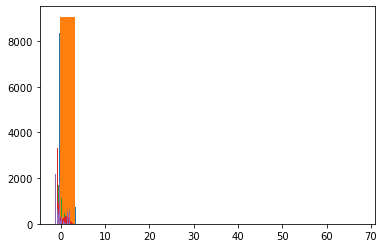

In [71]:
df1=data.copy()
# df1.head()
# uint8 cols are dummy cols
print(df1.dtypes[df1.dtypes != 'uint8'])

numerical_cols=[ 'Do_Not_Email', 'Do_Not_Call','TotalVisits',
                'Total_Time_Spent_on_Website',
                'Page_Views_Per_Visit']
print("\n=======numerical_cols\n",numerical_cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[numerical_cols]=scaler.fit_transform(df1[numerical_cols])
print(df1[numerical_cols].describe())
# print(df1[numerical_cols])

df2=df1[numerical_cols]
df2.describe()
for c in numerical_cols:
    plt.hist(df2[c],bins=20)
# plt.hist(df2[:,1],bins=20)
# plt.hist(df2[:,2],bins=20)
# plt.hist(df2[:,3],bins=20)



### Conclusion:
The numerical features are now centered on the mean with a unit standard deviation. 

 
   

 

### Comparing unscaled, scaled, normalized data
    

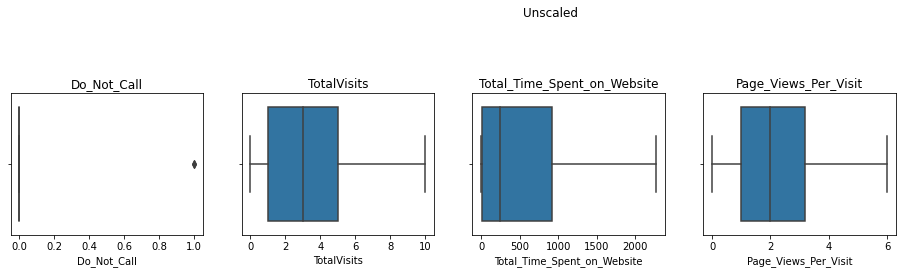

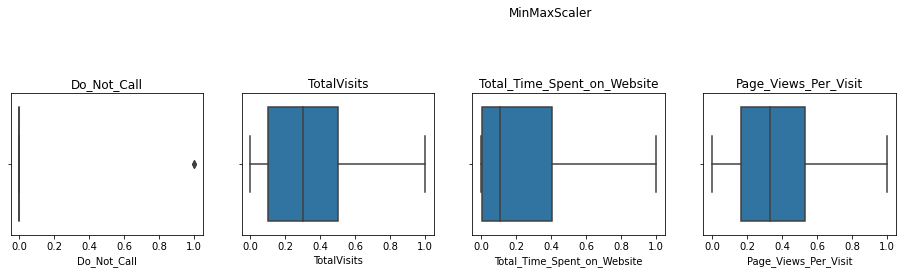

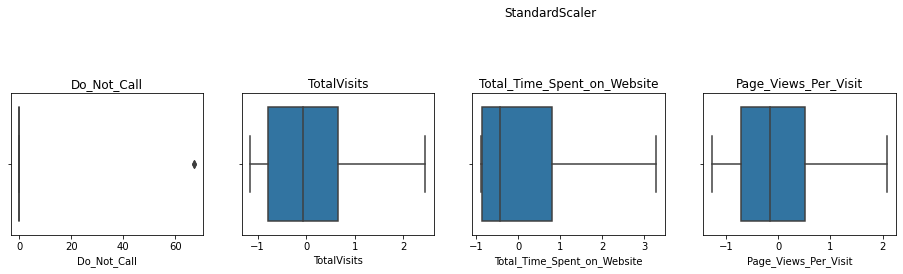

In [52]:

#Unscaled 
plt.figure(figsize=(20, 12))
i=1
for c in numerical_cols:
    plt.subplot(4,5,i)
    sns.boxplot(data[c])
    plt.title(c)
    i = i + 1
plt.suptitle('Unscaled')
plt.show()


plt.figure(figsize=(20, 12))
i=1
for c in numerical_cols:
    plt.subplot(4,5,i)
    sns.boxplot(df[c])
    plt.title(c)
    i = i + 1
plt.suptitle('MinMaxScaler')
plt.show()


plt.figure(figsize=(20, 12))
i=1
for c in numerical_cols:
    plt.subplot(4,5,i)
    sns.boxplot(df1[c])
    plt.title(c)
    i = i + 1
plt.suptitle('StandardScaler')
plt.show()



### Conclusion : 
- Min-Max scaling (Normalisation): fit all values between 0 and 1 - probability
- Standardisation (std scalar) :mean-0, sigma-1

# Feature Importance


In [53]:
# Identify important features
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)


NameError: name 'X' is not defined

In [ ]:

print(model.feature_importances_)


In [ ]:

#top 15 important features 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Model Building - using ScikitLearn
Scikit Learn provides 3 types of objects : 
- 1. Estimators
Calculates parameters internally from the dataset.
It provides classes which have fit() and transform() methods.
Eg Imputer(strategy="median") to fill missing values

- 2. Transformers
It takes some input and returns output based on learnings from fit()
It has fit_transform() method which fits and then transforms.

- 3. Predictors
LinearRegression class is a predictor
It has fit(), predict() and score() methods to build the model and evaluate its performance

### Split Train/Test = 70%/30%


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)


predictions=rfe.predict(X_test)



In [ ]:
sns.distplot(y_test-predictions)


### Conclusion:
It is a normal curve, so our prediction is good.

In [ ]:
plt.scatter(y_test,predictions)


### Conclusion:
Distribution shows that it is not linear regression, and it is binary classification

# Performance Metrics
- Find the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

- Confusion Matrix
- Accuracy, Precision,Recall, F1 score and finding Optimal Cutoff Point
    - Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
- ROC Curve, cutoff
   - An ROC curve demonstrates several things:

    It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


### Performance Metrics 1 - MSE/RMSE/MAE/MAPE

In [ ]:
from sklearn import metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


### Performance Metrics 2 - Confusion matrix 

In [ ]:

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)



### Performance Metrics 3 - Probability/Accuracy/Sensitivity/Specificity/Accuracy-sensitivity-cutoff



In [ ]:
# Statistical Metrics - accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('sensitivity=',TP / float(TP+FN))

# Let us calculate specificity
print('specificity=',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate=',FP/ float(TN+FP))

# positive predictive value 
print ('true positive rate',TP / float(TP+FP))

# Negative predictive value
print ('true negative rate',TN / float(TN+ FN))

### Optimal Cutoff Point from accuracy and sensitivity

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()




### Performance Metrics 4 - Precision/Recall/Precision-Recall-tradeoff 


In [ ]:

#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


# Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()





### Performance Metrics 5 - Plotting the ROC Curve


In [ ]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Feature Selection
- Method - 1 : Feature Selection using Correlation
- Method 2 - Feature Selection using Information Gain
- Method 3 - Feature Selection using  RFE
     - The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

     - 1. Checking VIF : 
    - Variance Inflation Factor or VIF, shows how much the feature variables are correlated with each other. 
    - The formula for calculating VIF is:VIFi=1/(1−Ri2)
    - If a VIF is > 10, model have high multicollinearity.
    - High multicollinearity between two variables indicates either of the features cannot be included in the model.
    - We can also lookup heatplot and pairplot and remove columns with very high VIF, as it is insignificant.


     - 2. Checking the p-value

   - Assumption:
H0 = Selected combination of dependent variables do not have any effect on the independent variables

    - The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that we can reject the null hypothesis.
    - The regression output  predictor variables are statistically significant because their p-values equal 0.000. 
    - On the other hand, feature is not statistically significant because its p-value > 0.05.
    - Keeping variables that are not statistically significant can reduce the model’s precision.
    - Hence we can remove such features which have p-value > 0.05.


3. Check effect of feature on p-value todrop columns
    - Build regression model using variables    
    - Calculate the p values for these variables, a high p-value( p-value > 0.05) indicates that the feature is insignificant. Insignificant features may cause bias in the model, hence should be discarded.
    - Also verify that the VIF is within range(VIF> 10) indicates that the feature has high multicollinearity with other variables
    - If the p values is higher than 0.05 threshhold or VIF is higher than 10, we discard that combination of features,  and rebuild the model.


4. Steps:

All columns have VIF < 10 since we have removed the highly correlated values using the heatmap. 
So we have to only check for high p-values (p-value > 0.05) 


#### What is meaning of p-value : 
https://www.simplypsychology.org/p-value.html

In [ ]:
### Method - 1 : Feature Selection using Correlation

def get_correlated_columns(df, cutoff):
    corr_mat = df.corr()
    col_corr=set()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if(abs(corr_mat.iloc[i,j])> cutoff):
                col_corr.add(corr_mat.columns[i])
    return col_corr



plt.figure(figsize=(25, 20))
sns.heatmap(X_train.corr(),cmap='YlGnBu',annot = False)
plt.show()

corr_features = get_correlated_columns(X_train,0.7)
print(corr_features)
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)


plt.figure(figsize=(25, 20))
sns.heatmap(X_train.corr(),cmap='YlGnBu',annot = False)
plt.show()


In [ ]:
### Method 2 - Feature Selection using Information Gain

from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

In [ ]:
### Method 3 - Feature Selection using  RFE

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


def get_rfe_result_summary(X_train_sm, summ):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['feature_name'] = X_train_sm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    s = summ.as_csv()
    s1 = s.split('\n')
    s1=s1[10:]
    summ_table=[]
    for i in s1:
        row=i.split(',')
        summ_table.append(row)
    df_linear_summary1 = pd.DataFrame(summ_table)

    df_linear_summary1.columns=['feature_name','coef','std_err','t_value','p_value','0.025','0.975']
    df_linear_summary1 = df_linear_summary1.iloc[1:]
    df_linear_summary1.feature_name.astype('object')
    df_linear_summary1.coef=df_linear_summary1.coef.astype('float64')
    df_linear_summary1.std_err=df_linear_summary1.std_err.astype('float64')
    df_linear_summary1.t_value=df_linear_summary1.t_value.astype('float64')
    df_linear_summary1.p_value=df_linear_summary1.p_value.astype('float64')
    df_linear_summary1['0.025']=df_linear_summary1['0.025'].astype('float64')
    df_linear_summary1['0.975']=df_linear_summary1['0.975'].astype('float64')
    df_linear_summary1.info()

    df_linear_summary1.feature_name  = df_linear_summary1.feature_name.str.replace(' ', '')
    vif.feature_name  = vif.feature_name.str.replace(' ', '')
    result = pd.merge(df_linear_summary1, vif, on='feature_name').copy()
    result.p_value = result.p_value.apply(lambda x:round(x,4))
    return result

# X_train_sm = sm.add_constant(X_train)
# logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
# summ=logm1.fit().summary()
# result = get_rfe_result_summary(X_train_sm, summ)
# print(result)

#### Feature Selection 
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)
# rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]

#Initial Model 
# Creating X_test dataframe with RFE selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
summ=res.summary()
result = get_rfe_result_summary(X_train_sm, summ)
print(result)

col1 = col.drop('Tags_invalid number',1)
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
summ=res.summary()
result = get_rfe_result_summary(X_train_sm, summ)
print(result)


col2 = col1.drop('Tags_wrong number given',1)
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
summ=res.summary()
result = get_rfe_result_summary(X_train_sm, summ)
print(result)




### Conclusion: - 

The VIFs and p-values both are within an acceptable range. 

The model has very low multicollinearity(VIF < 10) between the predictors.

Also the p-values(p_value <0.05) for all the predictors are significant.

 F-statistic:                     254.3
 
 :          2.62e-180

The F-Statistics value is greater than 1 and the Prob (F-statistic) is 0 , so indicates that the overall model is significant 


So this our final model and we can make our predictions using this model.

We can rebuild model if test data values are different. 



#### We define the Null Hypothesis as:
- H0:B1=B2=...=Bn=0
- H1:at least one Bi!=0



X_train_sm model coefficient values:
 - const = 22.7763 = 
 - Do Not Email = -1.3829 = 
 - Lead Source_Weling ak Website = 5.4649 = 
 - Tags_Busy = 3.8894 = 
 - Tags_Closed by Horizzon = 8.8729 = 
 - Tags_Lost to EINS = 9.7107 = 
 - Tags_Will revert after reading the email = 4.1641 = 
 - Lead Quality_Not Sure = -4.1231 = 
 - Lead Quality_Worst = -4.7984 = 


A positive coefficient value indicated that a unit increase in temp variable, increases the bookings counts by "coeff" units.

    
A negative coefficient value indicated that a unit increase in temp variable, decreases bookings counts by "coeff" units.

const means even if other vars are not there min bookings will happen.
    
    
#### Note:
As coefficients are not 0, so we reject the null hypothesis H0.

In [ ]:

# Predict the values using final model
X_test.head()
X_test.describe()

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
print(y_train_pred_final.head())

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
print(y_train_pred_final.head())


### Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('sensitivity=',TP / float(TP+FN))
print('specificity=',TN / float(TN+FP))
print('false postive rate(predicting churn when customer does not have churned)=',FP/ float(TN+FP))
print ('true positive rate',TP / float(TP+FP))
print ('true negative rate',TN / float(TN+ FN))

# Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Making predictions on the test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()
X_test = X_test[col2]
X_test.head()
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let us calculate specificity
TN / float(TN+FP)

# Creating a pipeline

sklearn provides Pipeline class to us to which we give list of all the classes which we have used above.

In [33]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5) 

# Creating a dummy variable for some of the categorical variables and dropping the first one.
df_categorical=data.select_dtypes(exclude=[np.int64, np.float64])
df_categorical=df_categorical.columns[1:]#Exclude Prospect ID column
dummy1 = pd.get_dummies(data[df_categorical], drop_first=True)
dummy1.head()
data = pd.concat([data, dummy1], axis=1)
data = data.drop(df_categorical, axis = 1)
data = data.drop(['Prospect ID'], axis = 1)

# Remove spaces from col names
cols=data.columns
cols=list(x.replace(' ','_') for x in cols)
data.columns=cols

# Splitting the data into train and test
from sklearn.model_selection import train_test_split
#Separate features and labels
# Putting feature variable to X and response var to Y

strat_train_set, strat_test_set  = train_test_split(data, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(strat_train_set)}\nRows in test set: {len(strat_test_set)}\n")

#separate features and labels
# 0:1 ratio of values in train should be same as 0:1 ratio in test
housing = strat_train_set.copy()
housing = strat_train_set.drop("Converted", axis=1)
housing_labels = strat_train_set["Converted"].copy()

# Create a list of pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

housing_num_tr = my_pipeline.fit_transform(housing)
print(housing_num_tr.shape)



# define the model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model = LogisticRegression()


#fit model
model.fit(housing_num_tr, housing_labels)

#check 
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)

#evaluate
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print("\n====Train RMSE : ",rmse)

## Using better evaluation technique - Cross Validation
# 1 2 3 4 5 6 7 8 9 10
# if rmse == 0 it could mean best model/overfitting
# to confirm use cross validation - divide the data into 10 bins and find error in each of the 10 parts.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("\n==== train rmse_scores : ",rmse_scores)

def print_scores(scores):
    print("\n===Train scores===")
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
print_scores( rmse_scores)

#save the model to Leads.joblib file
from joblib import dump, load
dump(model, 'Leads.joblib') 

#test the model on test dataset
X_test = strat_test_set.drop("Converted", axis=1)
Y_test = strat_test_set["Converted"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("\n====RMSE Test : ",final_rmse)
# print("\n====Modify values in the below record cols \n", prepared_data[0])

#Using the model
#Modify the sample_check_record to use the model
from joblib import dump, load
import numpy as np
model = load('Leads.joblib') 
sample_check_record = prepared_data[0]
features = np.array([sample_check_record])
model.predict(features)


Rows in train set: 7392
Rows in test set: 1848

(7392, 185)

====Train RMSE :  0.24062508784503936

==== train rmse_scores :  [0.24105623 0.23249528 0.2652647  0.25218933 0.27031781 0.26011343
 0.24400803 0.25218933 0.28255551 0.25485808]

===Train scores===
Scores: [0.24105623 0.23249528 0.2652647  0.25218933 0.27031781 0.26011343
 0.24400803 0.25218933 0.28255551 0.25485808]
Mean:  0.25550477334863925
Standard deviation:  0.01400156873448029

====RMSE Test :  0.2537596094612761


array([0], dtype=int64)


=================================================
    LinearRegression()
    Rows in train set: 7392
    Rows in test set: 1848
    
    (7392, 185)
    
    ====Train RMSE :  0.24177798618950763
    
    ==== train rmse_scores :  [2.18242094e+12 2.11107197e+11 1.24036991e+13 8.04957252e+12
     4.34978189e+09 2.75895001e+10 9.05640475e+11 1.52950294e+13
     1.93937599e+13 4.47352809e+12]
    
    ===Train scores===
    Scores: [2.18242094e+12 2.11107197e+11 1.24036991e+13 8.04957252e+12
     4.34978189e+09 2.75895001e+10 9.05640475e+11 1.52950294e+13
     1.93937599e+13 4.47352809e+12]
    Mean:  6294669696826.682
    Standard deviation:  6768422996448.638
    
    ====RMSE Test :  2467170252.920963
    
array([0.12213187])

=================================================

    DecisionTreeRegressor()
    Rows in train set: 7392
    Rows in test set: 1848
    
    (7392, 185)
    
    ====Train RMSE :  0.0
    
    ==== train rmse_scores :  [0.25732512 0.28711049 0.29197661 0.28255551 0.27280927 0.25485808
     0.28730468 0.30334178 0.3055641  0.29428476]
    
    ===Train scores===
    Scores: [0.25732512 0.28711049 0.29197661 0.28255551 0.27280927 0.25485808
     0.28730468 0.30334178 0.3055641  0.29428476]
    Mean:  0.28371303907685697
    Standard deviation:  0.01648153526348211
    
    ====RMSE Test :  0.28867513459481287
    
array([0.])

=================================================
RandomForestRegressor

Rows in train set: 7392
Rows in test set: 1848

(7392, 185)

====Train RMSE :  0.07997801375367285

==== train rmse_scores :  [0.19210463 0.2055681  0.21503847 0.22611893 0.21166042 0.21655189
 0.21650752 0.23142174 0.22808166 0.21870884]

===Train scores===
Scores: [0.19210463 0.2055681  0.21503847 0.22611893 0.21166042 0.21655189
 0.21650752 0.23142174 0.22808166 0.21870884]
Mean:  0.21617622147305263
Standard deviation:  0.010924049211347415

====RMSE Test :  0.22353128140426737

array([0.02])

=================================================
LogisticRegression()

Rows in train set: 7392
Rows in test set: 1848

(7392, 185)

====Train RMSE :  0.24062508784503936

==== train rmse_scores :  [0.24105623 0.23249528 0.2652647  0.25218933 0.27031781 0.26011343
 0.24400803 0.25218933 0.28255551 0.25485808]

===Train scores===
Scores: [0.24105623 0.23249528 0.2652647  0.25218933 0.27031781 0.26011343
 0.24400803 0.25218933 0.28255551 0.25485808]
Mean:  0.25550477334863925
Standard deviation:  0.01400156873448029

====RMSE Test :  0.2537596094612761

array([0], dtype=int64)

# Deployment

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('logistic_lead_score.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)